## Import Data

In [110]:
import os
import pandas as pd
import numpy as np

DIR = os.getcwd()
print(DIR)

df = pd.read_csv(DIR + "/2015to2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.head()

/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,15,57) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225038,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595836,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
1,C00575795,HILLARY FOR AMERICA,2016,M10,201701099041150117,17A,C11241249,1137625,NaN,IND,...,F3P,4010920171359608009,t,NaN,2016,SA,NaN,4011120171366214585,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
2,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225036,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595829,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
3,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041274498,17A,C12244496,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366556953,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
4,C00179408,MAINE DEMOCRATIC PARTY,2016,M9,201909059163143517,11AI,11AI-000039245,1350680,NaN,IND,...,F3X,4090520191672279180,t,NaN,2016,SA,NaN,4090620191672313017,http://docquery.fec.gov/cgi-bin/fecimg/?201909...,Contributions From Individuals/Persons Other T...


## Data Cleaning: Select desired columns, remove other "Columbia" institutions and remove negative values under contributions

In [111]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [112]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

df_selections = df_selections[df_selections["contribution_receipt_amount"] >= 0]  

## Create dataframes with contributions to each campaign

In [114]:
df_HILLARY = df_selections[df_selections["committee_name"].str.contains("HILLARY FOR AMERICA")]

df_HILLARY.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
0,840,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-28,40.0,COLUMBIA UNIVERSITY,FINANCIAL ANALYST,BRUCE,NaN,MACDONALD
1,923,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-03,80.0,COLUMBIA UNIVERSITY,CHEMIST,MILAN,NaN,STOJANOVIC
2,924,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-17,250.0,COLUMBIA UNIVERSITY,PHYSICIAN,RAGY,NaN,GIRGIS
3,942,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-06,2.4,COLUMBIA UNIVERSITY,STUDENT,JAMES,NaN,MCCONNELL
4,977,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-11,28.0,COLUMBIA UNIVERSITY,PROFESSOR,JOSEPH,NaN,TERWILLIGER
5,7696,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-10-23,80.0,COLUMBIA UNIVERSITY,ASSOCIATE PROFESSOR,ANDREI,NaN,TKATCHENKO
6,9620,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-03-09,150.8,COLUMBIA UNIVERSITY,PROFESSOR,JOSEPH,NaN,TERWILLIGER
7,26478,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-06,2.4,COLUMBIA UNIVERSITY,STUDENT,HOUSTON,NaN,BROWN
8,27026,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-12-14,0.8,COLUMBIA UNIVERSITY,STUDENT,ELISEO,NaN,SANTOS
9,27027,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-12-08,0.8,COLUMBIA UNIVERSITY,CONSULTANT ARTS & CULTURE,ISKRITSA,NaN,OGNIANOVA


## Group contributions by receipt date for each campaign and visualize!

In [118]:
df_HILLARY = df_HILLARY.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Trump Campaign since Announcement of Clinton Candidacy (4/12/2015) even though nobody donated to Trump for forever')

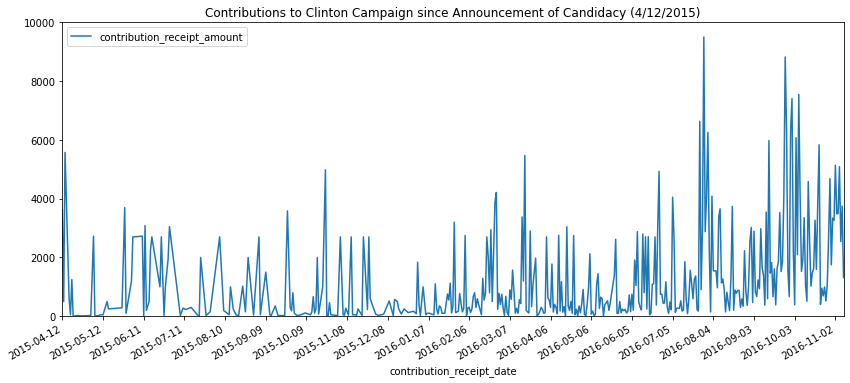

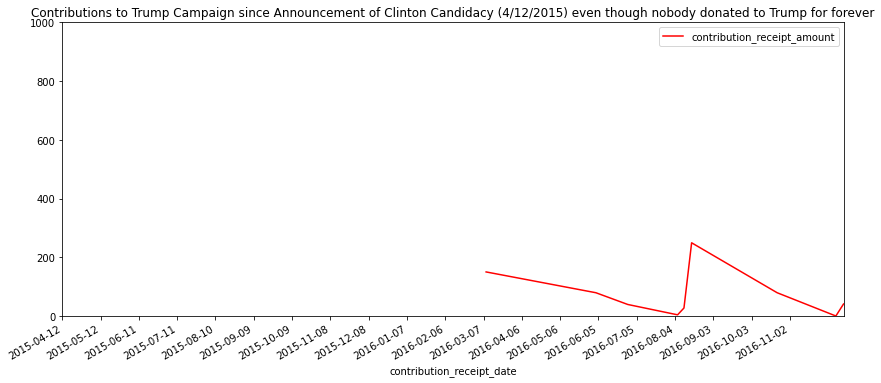

In [119]:
from datetime import datetime, timedelta
t = np.arange(datetime(2015,4,12), datetime(2016,11,10), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_HILLARY.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 10000])
ax1.set_title("Contributions to Clinton Campaign since Announcement of Candidacy (4/12/2015)")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 1000])
ax2.set_title("Contributions to Trump Campaign since Announcement of Clinton Candidacy (4/12/2015) even though nobody donated to Trump for forever")

## Collect and visualize top committes by funds raised over 2015-2016

In [124]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,119,HILLARY FOR AMERICA,501862.80
1,3,ACTBLUE,334556.75
2,120,HILLARY VICTORY FUND,254830.90
3,70,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,238756.63
4,26,BERNIE 2016,69740.95


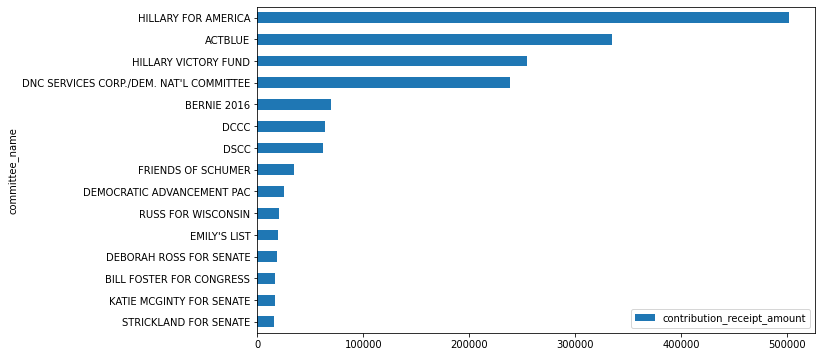

In [125]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

## Collect and visualize occupation of individual Columbia donors 

In [126]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
occupations = df_occ["contributor_occupation"].value_counts()

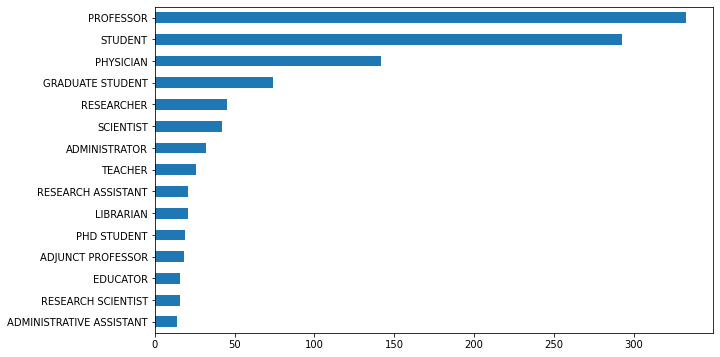

In [127]:
ax5 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax5.invert_yaxis()